# Filter

Filter adalah sebuah alat atau proses yang digunakan untuk memodifikasi karakteristik sinyal digital. Tujuan utama dari penggunaan filter adalah untuk mengubah atau meningkatkan sinyal tersebut sesuai dengan kebutuhan tertentu, seperti menghilangkan atau mengurangi noise, mereduksi gangguan, atau menyoroti komponen-komponen tertentu dari sinyal tersebut.

Filter dapat beroperasi dalam berbagai domain, seperti domain waktu, frekuensi, atau domain lainnya tergantung pada jenis filter yang digunakan. Terdapat beberapa jenis filter yang umum digunakan dalam pengolahan sinyal digital, di antaranya adalah:

1. **Filter FIR (Finite Impulse Response)**: Filter ini memiliki respons impuls yang berhingga. Filter FIR menggunakan koefisien yang tetap untuk menghitung respons sinyal keluaran berdasarkan sejumlah sampel masukan sebelumnya.

2. **Filter IIR (Infinite Impulse Response)**: Berbeda dengan FIR, filter IIR memiliki respons impuls yang tak hingga. Filter ini menggunakan koefisien yang mengalami umpan balik dalam perhitungannya, yang memungkinkan filter ini untuk memiliki respons frekuensi yang lebih kompleks.

3. **Filter Butterworth, Chebyshev, Elliptic, dan lainnya**: Ini adalah jenis filter yang memenuhi persyaratan tertentu dalam respons frekuensinya. Misalnya, filter Butterworth dirancang untuk memberikan tanggapan frekuensi yang paling datar mungkin dalam rentang frekuensi tertentu, sementara filter Chebyshev memiliki riple (fluktuasi) dalam respons frekuensinya tetapi memberikan karakteristik pemotongan yang lebih tajam.

4. **Filter adaptif**: Filter ini dapat menyesuaikan karakteristiknya sesuai dengan sinyal masukan atau kondisi lingkungan yang berubah. Filter adaptif sering digunakan dalam aplikasi di mana karakteristik sinyal atau lingkungan dapat bervariasi, seperti komunikasi nirkabel atau pengolahan audio.

Filter dalam pengolahan sinyal digital sangat penting karena memungkinkan untuk manipulasi sinyal dengan cara yang presisi dan terkontrol. Dengan memilih filter yang tepat dan mengatur parameter-parameter filter dengan bijak, sinyal digital dapat diolah untuk memenuhi berbagai kebutuhan aplikasi, mulai dari komunikasi wireless hingga pemrosesan audio dan video.

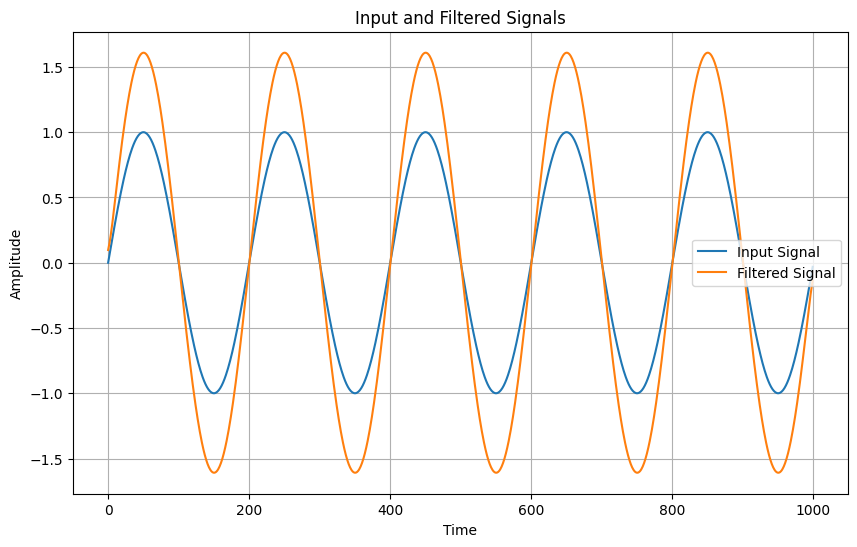

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menerapkan filter FIR pada sinyal masukan
def apply_fir_filter(signal, filter_coefficients):
    filtered_signal = np.convolve(signal, filter_coefficients, mode='same')
    return filtered_signal

# Fungsi untuk membuat sinyal masukan
def generate_input_signal(duration, sampling_rate):
    t = np.arange(0, duration, 1/sampling_rate)
    frequency = 5  # Frekuensi sinyal
    input_signal = np.sin(2 * np.pi * frequency * t)
    return input_signal

# Fungsi untuk membuat filter FIR
def create_fir_filter(order, cutoff_frequency, sampling_rate):
    nyquist_rate = sampling_rate / 2
    normalized_cutoff_frequency = cutoff_frequency / nyquist_rate
    filter_coefficients = np.zeros(order + 1)
    filter_coefficients[0] = 2 * normalized_cutoff_frequency
    for i in range(1, order + 1):
        sinc_value = np.sin(2 * np.pi * normalized_cutoff_frequency * (i - order / 2)) / (i - order / 2)
        window_value = 0.54 - 0.46 * np.cos(2 * np.pi * i / order)
        filter_coefficients[i] = sinc_value * window_value
    return filter_coefficients

# Parameter sinyal dan filter
duration = 1  # Durasi sinyal dalam detik
sampling_rate = 1000  # Frekuensi sampling dalam Hz
order = 25  # Orde filter FIR
cutoff_frequency = 10  # Frekuensi potong filter dalam Hz

# Membuat sinyal masukan
input_signal = generate_input_signal(duration, sampling_rate)

# Membuat filter FIR
filter_coefficients = create_fir_filter(order, cutoff_frequency, sampling_rate)

# Menerapkan filter pada sinyal masukan
filtered_signal = apply_fir_filter(input_signal, filter_coefficients)

# Plot sinyal masukan dan keluaran
plt.figure(figsize=(10, 6))
plt.plot(input_signal, label='Input Signal')
plt.plot(filtered_signal, label='Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input and Filtered Signals')
plt.legend()
plt.grid(True)
plt.show()


# Windows

Windows mengacu pada fungsi matematis yang digunakan untuk memodifikasi sinyal sebelum atau sesudah proses transformasi sinyal tertentu, seperti transformasi Fourier atau teknik analisis spektral lainnya. Fungsi jendela ini digunakan untuk mengurangi efek yang disebabkan oleh tepi sinyal, yang dapat menghasilkan distorsi atau artefak dalam hasil transformasi.

Ada berbagai jenis fungsi jendela yang digunakan dalam pengolahan sinyal digital, masing-masing dengan karakteristik yang berbeda. Beberapa fungsi jendela yang umum digunakan termasuk:

1. **Rectangular Window**: Fungsi jendela ini memiliki amplitudo konstan di dalam jangka waktu tertentu dan nilai nol di luar jangka waktu tersebut.

2. **Hamming Window**: Fungsi jendela Hamming memiliki bentuk yang lebih halus daripada jendela rectangular, dengan penurunan amplitudo yang lebih lambat di ujung-ujungnya.

3. **Hanning (Hann) Window**: Seperti Hamming, jendela Hanning juga mengurangi efek sisi dari transformasi sinyal, tetapi dengan penurunan amplitudo yang lebih cepat di ujung-ujungnya.

4. **Blackman Window**: Fungsi jendela Blackman memiliki bentuk yang lebih kompleks, dengan penurunan amplitudo yang lebih cepat di ujung-ujungnya dan respon frekuensi yang lebih baik.

Fungsi jendela digunakan dalam berbagai aplikasi pengolahan sinyal digital, termasuk dalam desain filter, analisis spektral, dan pemrosesan sinyal lainnya. Dengan memilih fungsi jendela yang sesuai dengan kebutuhan spesifik aplikasi, efek sisi dari transformasi sinyal dapat diminimalkan, sehingga menghasilkan hasil yang lebih akurat dan berkualitas.

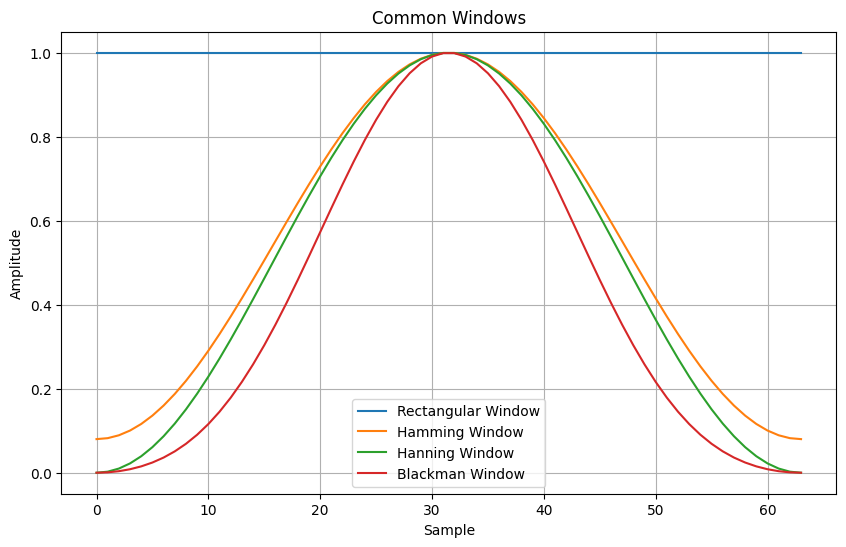

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk membuat jendela rectangular
def rectangular_window(length):
    return np.ones(length)

# Fungsi untuk membuat jendela Hamming
def hamming_window(length):
    return 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(length) / (length - 1))

# Fungsi untuk membuat jendela Hanning
def hanning_window(length):
    return 0.5 * (1 - np.cos(2 * np.pi * np.arange(length) / (length - 1)))

# Fungsi untuk membuat jendela Blackman
def blackman_window(length):
    a0 = 0.42
    a1 = 0.5
    a2 = 0.08
    n = np.arange(length)
    return a0 - a1 * np.cos(2 * np.pi * n / (length - 1)) + a2 * np.cos(4 * np.pi * n / (length - 1))

# Panjang jendela
window_length = 64

# Membuat jendela menggunakan fungsi yang telah didefinisikan
rectangular = rectangular_window(window_length)
hamming = hamming_window(window_length)
hanning = hanning_window(window_length)
blackman = blackman_window(window_length)

# Plotting jendela-jendela
plt.figure(figsize=(10, 6))
plt.plot(rectangular, label='Rectangular Window')
plt.plot(hamming, label='Hamming Window')
plt.plot(hanning, label='Hanning Window')
plt.plot(blackman, label='Blackman Window')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Common Windows')
plt.legend()
plt.grid(True)
plt.show()


Fungsi jendela rectangular adalah salah satu jenis fungsi jendela yang paling sederhana dan paling mudah dimengerti. Jendela rectangular memiliki amplitudo konstan di dalam jangka waktu tertentu dan nilai nol di luar jangka waktu tersebut. Dengan kata lain, jendela rectangular adalah fungsi kotak yang memiliki nilai satu di dalam interval tertentu dan nol di luar interval tersebut.

Fungsi jendela Hamming adalah salah satu jenis fungsi jendela yang umum digunakan dalam pengolahan sinyal digital. Jendela Hamming dirancang untuk mengurangi efek samping yang terjadi saat menggunakan jendela rectangular dalam proses transformasi sinyal, seperti transformasi Fourier.

Fungsi jendela Hanning, juga dikenal sebagai Hann window, adalah salah satu jenis fungsi jendela yang umum digunakan dalam pengolahan sinyal digital. Jendela Hanning sering digunakan untuk mengurangi efek samping yang terjadi saat menggunakan jendela rectangular dalam proses transformasi sinyal, seperti transformasi Fourier.

Fungsi jendela Blackman, yang dinamai dari ilmuwan John Blackman, adalah jenis jendela lain yang sering digunakan dalam pengolahan sinyal digital. Serupa dengan jendela Hamming dan Hanning, jendela Blackman juga dirancang untuk mengurangi efek samping yang terjadi saat menggunakan jendela rectangular dalam proses transformasi sinyal, seperti transformasi Fourier.